In [1]:
#Import required python modules
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#load data from file
data = np.genfromtxt('iris.csv', delimiter=',',skip_header=True)

input_columns = [0,1]
output_column = [5]

#Distribute data into train and test sets
X_train = data[:80,input_columns]
Y_train = data[:80,output_column]

X_test = data[-20:,input_columns]
Y_test = data[-20:,output_column]


In [3]:
#Generate the model
model = KNeighborsClassifier(n_neighbors=3,p=2)
model.fit(X_train, Y_train)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [4]:
#Check for an example scenario
#example_input = [[1,1,3.5,1]]
example_input = [[5.2,2.9]]
print(model.predict(example_input))
print(model.predict_proba(example_input))

[0.]
[[0.66666667 0.33333333]]


In [5]:
#Calculate the performance of the model using model defined score function
print(model.score(X_test,Y_test))

0.95


In [1]:
#Calculate the performance of the model using model defined predict function
resultMatrix = model.predict(X_test).reshape(-1,1)
print(resultMatrix.shape)
correctCount = sum((resultMatrix==Y_test).astype(int))
totalCount = len(X_test)
print("Total Correct Count: ",correctCount," Total Wrong Count: ",totalCount-correctCount," Accuracy: ",(correctCount*100)/(totalCount))

NameError: name 'model' is not defined

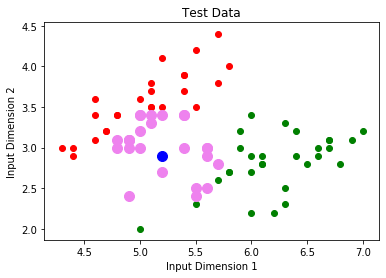

In [19]:
#Plot to show points
def setFigureValues(numberOfNeighborsToShow=3,showNeighbors=False):
    plt.title('Test Data') 
    plt.xlabel('Input Dimension 1') 
    plt.ylabel('Input Dimension 2') 
    plt.xticks() 
    plt.yticks() 

    axes = plt.gca()
    class0_inputDim1 = [pointX[0] for pointX, pointY in zip(X_train,Y_train) if pointY==0]
    class0_inputDim2 = [pointX[1] for pointX, pointY in zip(X_train,Y_train) if pointY==0]
    class1_inputDim1 = [pointX[0] for pointX, pointY in zip(X_train,Y_train) if pointY==1]
    class1_inputDim2 = [pointX[1] for pointX, pointY in zip(X_train,Y_train) if pointY==1]
    
    plt.scatter(class0_inputDim1,class0_inputDim2,color='green')
    plt.scatter(class1_inputDim1,class1_inputDim2,color='red') 
    plt.scatter(example_input[0][0],example_input[0][1], s=100, color='blue')
    
    if showNeighbors == True:
        #The n_neighbors in the following line is to show the nearest neighbors as specified. However, the number 
        #of neighbors that should be used to take decision is the one given during the model construction
        neighbors_inputDim1=[X_train[r][:,0] for r in model.kneighbors(example_input,n_neighbors=numberOfNeighborsToShow)[1]]
        neighbors_inputDim2=[X_train[r][:,1] for r in model.kneighbors(example_input,n_neighbors=numberOfNeighborsToShow)[1]]
        plt.scatter(neighbors_inputDim1,neighbors_inputDim2, s=100, color='violet')
        

    
    plt.savefig("Output.png")
    

setFigureValues(25,True)
#plt.scatter(example_input, regr.predict(X_test_Sample), s=100, color='red')
#plt.scatter(example_input, regr.predict(X_test_Sample), s=100, color='red')


In [82]:
print(model.kneighbors(example_input,n_neighbors=5))


(array([[0.        , 0.36055513, 0.36055513, 0.36055513, 0.42426407]]), array([[49, 74, 25, 79,  1]], dtype=int64))
